# Coursera project : Unsupervised learning

## Analysis of diabetes

In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_diabetes

data = load_diabetes(as_frame = True).data

In [4]:
data.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [6]:
data.describe()

age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17  
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  
min   -1.156131e-01 -1.023071e-01 -7.639450e-02 -1.260971e-01 -1.377672e-01  
25%   -3.035840e-02 -3.511716e-02 -3.949338e-02 -3.324559e-02 -3.317903e-02  
50%   -3.819065e-03 -6.584468e-03 -2.592262e-03 -1.947171e-03 -1.077698e-03  
75%    2.984439e-02  2.931150e-02  3.430886e-02  3.243232e-02  2.791705e-02  
max    1.987880e-01  1.811791e-01  1.852344e-01  1.335973e-01  1.356118e-01

In [7]:
sum(data.duplicated()) == 0

True

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'bp'}>, <Axes: title={'center': 's1'}>,
        <Axes: title={'center': 's2'}>],
       [<Axes: title={'center': 's3'}>, <Axes: title={'center': 's4'}>,
        <Axes: title={'center': 's5'}>],
       [<Axes: title={'center': 's6'}>, <Axes: >, <Axes: >]], dtype=object)

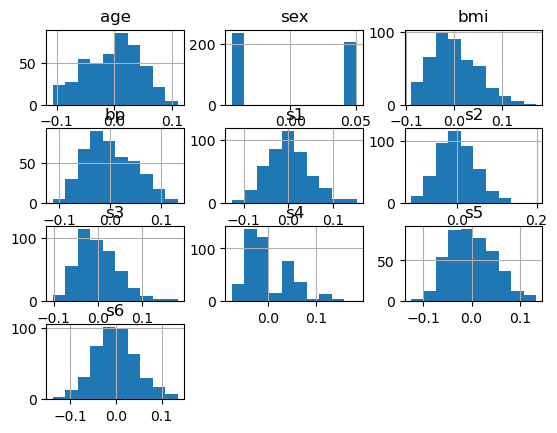

In [8]:
data.hist()

In [9]:
data['sex'].value_counts()

-0.044642    235
 0.050680    207
Name: sex, dtype: int64

In [10]:
data.isnull().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

In [11]:
from scipy.stats.mstats import normaltest 
for i  in data.columns:
    if normaltest(data[i]).pvalue < 0.05:
        print(i)

age
sex
bmi
bp
s1
s2
s3
s4
s5


In [12]:
from scipy import stats
for i  in data.columns:
    if stats.kstest((data[i]-data[i].mean())/data[i].std(), stats.norm.cdf).pvalue < 0.05:
        print(i)

sex
bmi
bp
s3
s4


age       Axes(0.125,0.11;0.065678x0.77)
sex    Axes(0.203814,0.11;0.065678x0.77)
bmi    Axes(0.282627,0.11;0.065678x0.77)
bp     Axes(0.361441,0.11;0.065678x0.77)
s1     Axes(0.440254,0.11;0.065678x0.77)
s2     Axes(0.519068,0.11;0.065678x0.77)
s3     Axes(0.597881,0.11;0.065678x0.77)
s4     Axes(0.676695,0.11;0.065678x0.77)
s5     Axes(0.755508,0.11;0.065678x0.77)
s6     Axes(0.834322,0.11;0.065678x0.77)
dtype: object

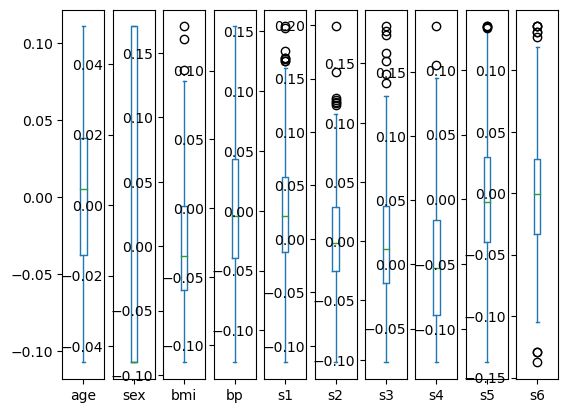

In [13]:
data.plot(kind = 'box', subplots = True)

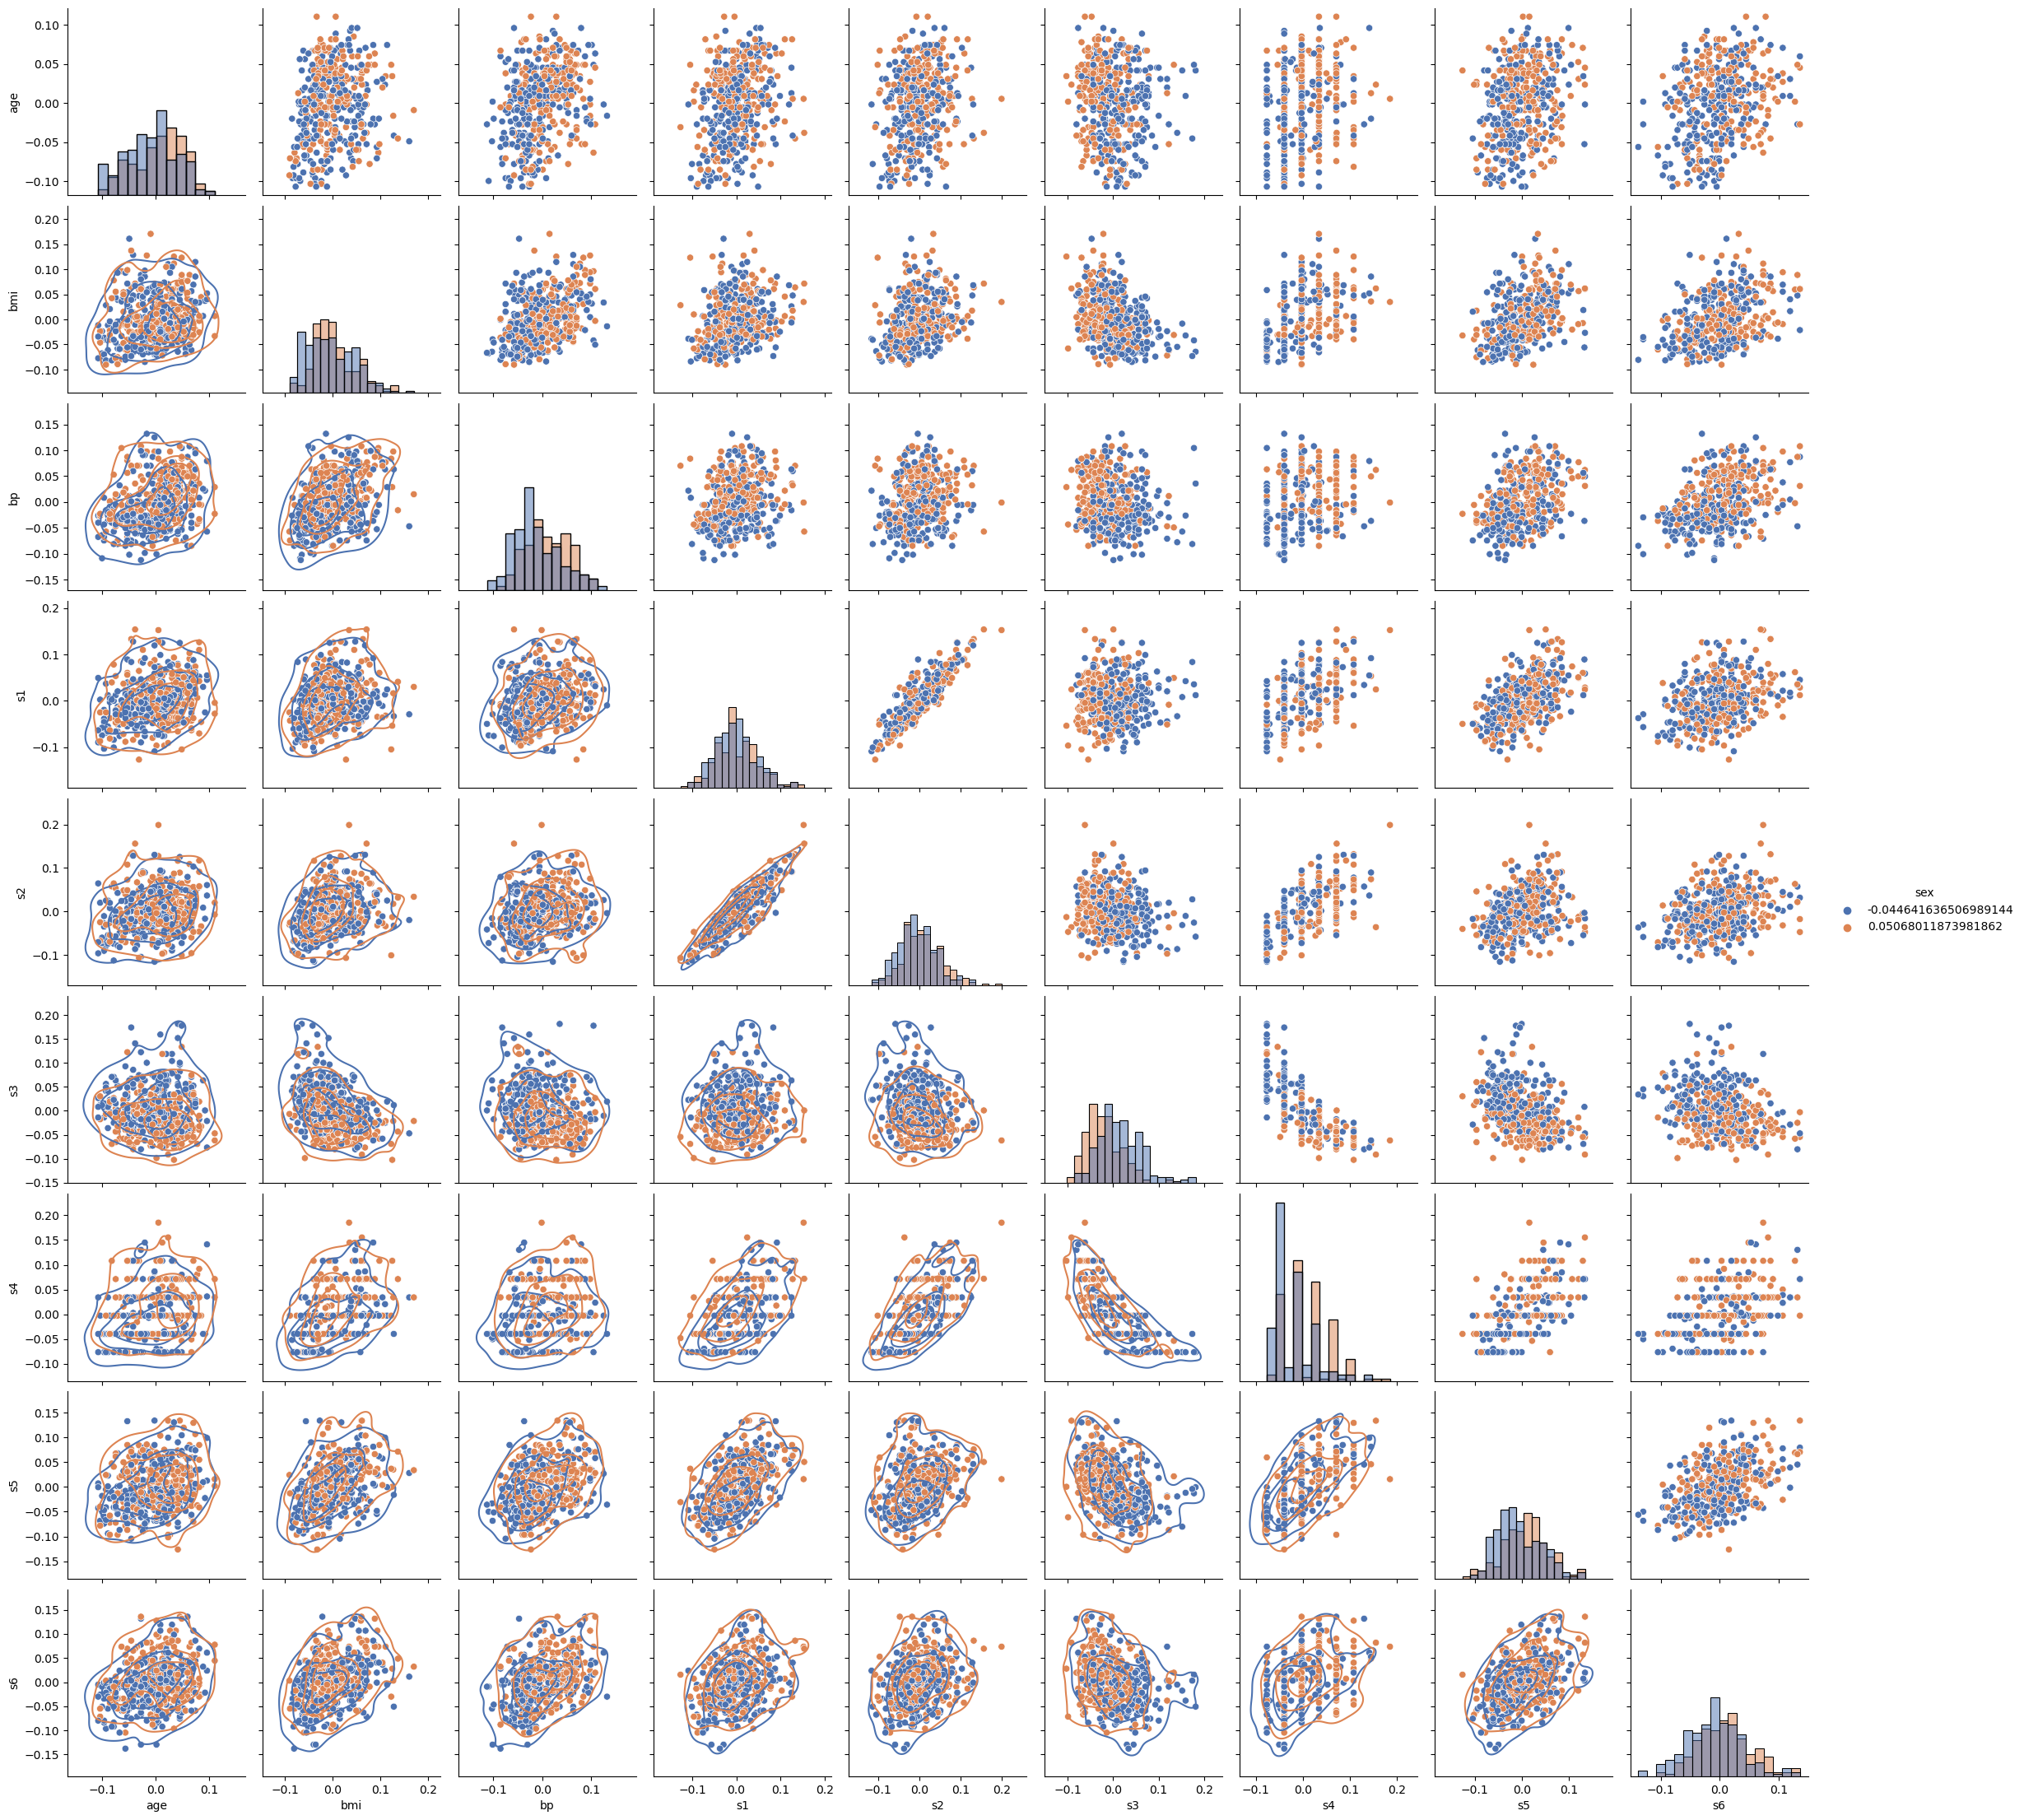

In [14]:
import seaborn as sns 
g = sns.pairplot(data, hue = 'sex', diag_kind="hist", palette = 'deep')
g.map_lower(sns.kdeplot, levels=4, color=".2")

          age       sex       bmi        bp        s1        s2        s3  \
age  1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181   
sex  0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
bmi  0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
bp   0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
s1   0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
s2   0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196455   
s3  -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455  1.000000   
s4   0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738493   
s5   0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398577   
s6   0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   

           s4        s5        s6  
age  0.203841  0.270774  0.301731  
sex  0.332115  0.149916  0.208133  
bmi  0.413807  0.446157  0.388680  
bp   0.2

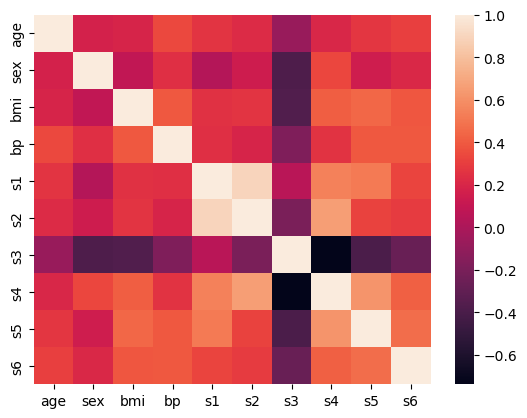

In [15]:
corr = data.corr()
sns.heatmap(corr)
print(corr)

<Axes: >

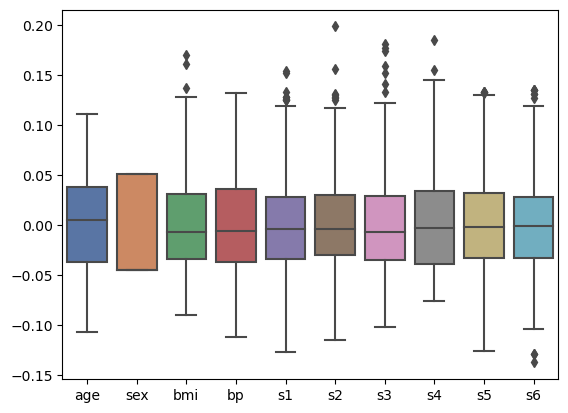

In [16]:
sns.boxplot(data, palette = 'deep')

<Axes: >

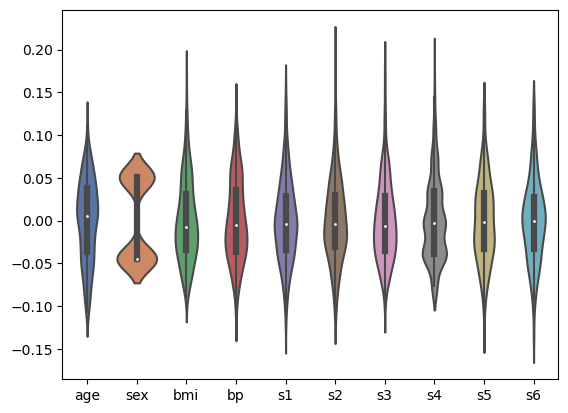

In [17]:
sns.violinplot(data, palette = 'deep')

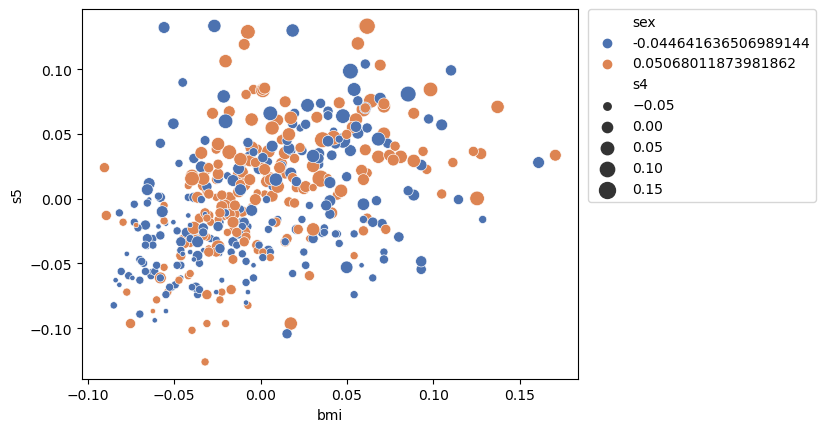

In [18]:
sns.scatterplot(data=data, x = 'bmi', y='s5', hue = 'sex', palette = 'deep', size = 's4',sizes=(15, 150))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

<Axes: xlabel='s4', ylabel='Count'>

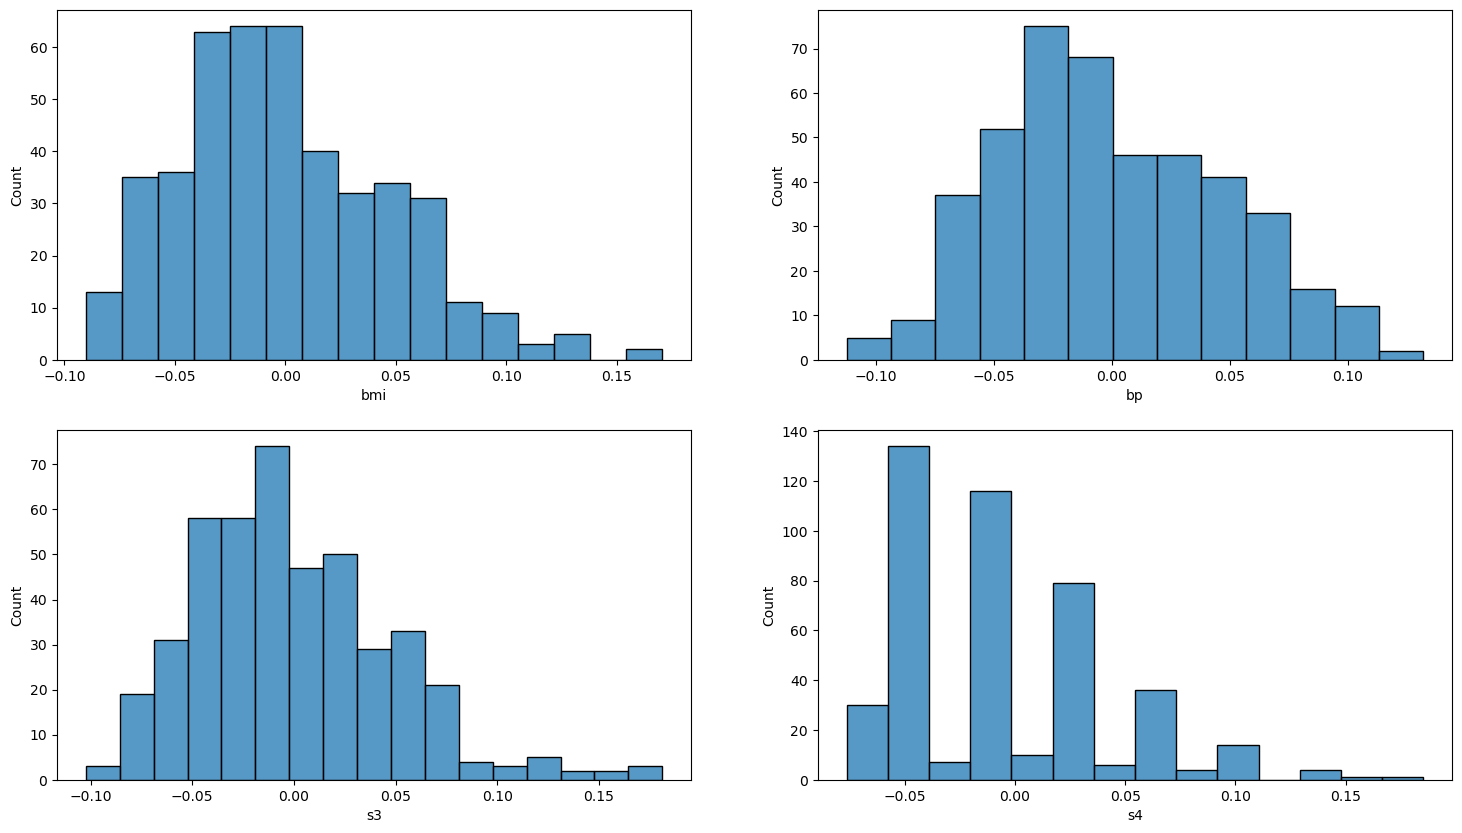

In [19]:
fig, axs = plt.subplots(2,2, figsize=(18, 10))
sns.histplot(ax = axs [0,0], data = data, x = 'bmi')
sns.histplot(ax = axs [0,1], data = data, x = 'bp')
sns.histplot(ax = axs [1,0], data = data, x = 's3')
sns.histplot(ax = axs [1,1], data = data, x = 's4')

In [20]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
features = ['age','sex','bmi', 'bp', 's1', 's2', 's4', 's5']
lm.fit(data[features], data['s3'])
print(lm.coef_)
lm.score(data[features], data['s3'])

[ 0.01146069 -0.01276814 -0.00994467 -0.00889998  1.70679614 -1.20863561
 -0.5016653  -0.57695035]


0.9350286258362346

In [21]:
corr_matrix = data.corr()
corr_matrix['s3'].sort_values(ascending=False)

s3     1.000000
s1     0.051519
age   -0.075181
bp    -0.178762
s2    -0.196455
s6    -0.273697
bmi   -0.366811
sex   -0.379090
s5    -0.398577
s4    -0.738493
Name: s3, dtype: float64

In [22]:
import statsmodels.api as sm
mod = sm.OLS(data['s3'],data[features])
fii = mod.fit()
p_values = fii.summary2()
print(p_values)

                        Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.934     
Dependent Variable:     s3               AIC:                         -2630.3607
Date:                   2023-07-30 21:31 BIC:                         -2597.6302
No. Observations:       442              Log-Likelihood:              1323.2    
Df Model:               8                F-statistic:                 780.7     
Df Residuals:           434              Prob (F-statistic):          3.29e-252 
R-squared (uncentered): 0.935            Scale:                       0.00014970
-------------------------------------------------------------------------------------
             Coef.       Std.Err.         t          P>|t|        [0.025       0.975]
-------------------------------------------------------------------------------------
age          0.0115        0.0134        0.8572      0.3918      -0.0148       0.0377
sex         -0.0128        0.0138

In [23]:
corr_matrix['sex'].sort_values(ascending=False)

sex    1.000000
s4     0.332115
bp     0.241010
s6     0.208133
age    0.173737
s5     0.149916
s2     0.142637
bmi    0.088161
s1     0.035277
s3    -0.379090
Name: sex, dtype: float64

In [24]:
features_2 = ['age','s3','bmi', 'bp', 's1', 's2', 's4', 's5']
mod = sm.OLS(data['sex'],data[features_2])
fii = mod.fit()
p_values = fii.summary2()
print(p_values)

                        Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.199     
Dependent Variable:     sex              AIC:                         -1528.1411
Date:                   2023-07-30 21:31 BIC:                         -1495.4106
No. Observations:       442              Log-Likelihood:              772.07    
Df Model:               8                F-statistic:                 14.72     
Df Residuals:           434              Prob (F-statistic):          4.23e-19  
R-squared (uncentered): 0.213            Scale:                       0.0018123 
-------------------------------------------------------------------------------------
              Coef.       Std.Err.         t         P>|t|        [0.025       0.975]
-------------------------------------------------------------------------------------
age           0.1065        0.0463       2.3004      0.0219       0.0155       0.1974
s3           -0.1546        0.166

In [25]:
corr_matrix['age'].sort_values(ascending=False)

age    1.000000
bp     0.335428
s6     0.301731
s5     0.270774
s1     0.260061
s2     0.219243
s4     0.203841
bmi    0.185085
sex    0.173737
s3    -0.075181
Name: age, dtype: float64

In [26]:
features_2 = ['sex','s3','bmi', 'bp', 's1', 's2', 's4', 's5']
mod = sm.OLS(data['age'],data[features_2])
fii = mod.fit()
p_values = fii.summary2()
print(p_values)

                        Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.149     
Dependent Variable:     age              AIC:                         -1501.2038
Date:                   2023-07-30 21:31 BIC:                         -1468.4733
No. Observations:       442              Log-Likelihood:              758.60    
Df Model:               8                F-statistic:                 10.64     
Df Residuals:           434              Prob (F-statistic):          1.08e-13  
R-squared (uncentered): 0.164            Scale:                       0.0019262 
--------------------------------------------------------------------------------------
           Coef.        Std.Err.          t          P>|t|         [0.025       0.975]
--------------------------------------------------------------------------------------
sex        0.1131         0.0492        2.3004       0.0219        0.0165       0.2098
s3         0.1475         0.1

In [27]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 20, random_state=42)

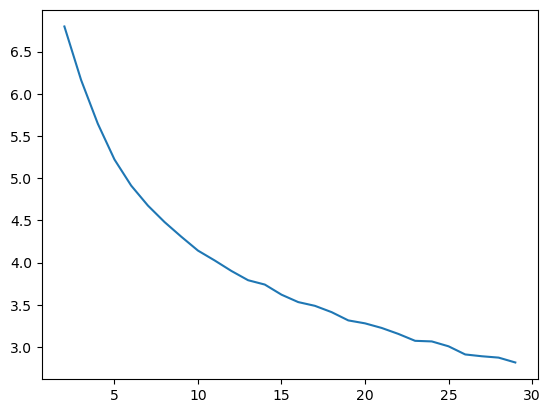

In [30]:
from sklearn.cluster import KMeans
inertia = []
for k in range(2, 30):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(train)
    inertia.append(kmeans.inertia_)
plt.plot(range(2,30),inertia)

https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb

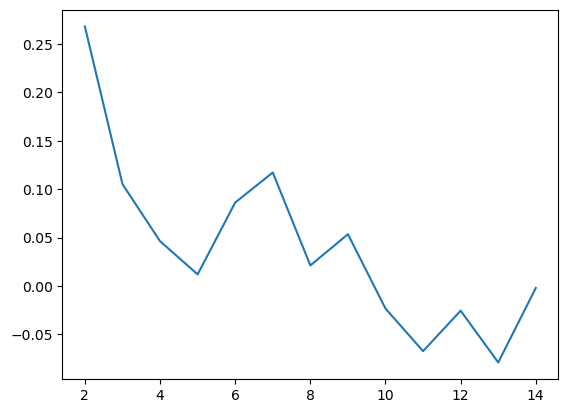

In [31]:
from sklearn.metrics import silhouette_score
sil = []
for k in range(2,15):
    kmeans = KMeans(n_clusters=k).fit(train)
    labels = kmeans.predict(test)
    sil.append(silhouette_score(test, labels, metric = 'euclidean'))
plt.plot(range(2,15),sil)

In [32]:
kmeans = KMeans(n_clusters=6).fit(data)
labels = kmeans.labels_.reshape(-1)

labels.shape

(442,)

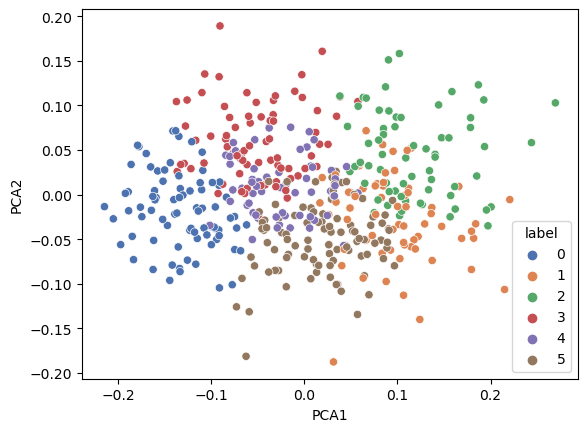

In [33]:
from sklearn.decomposition import PCA
def plot_pca(data, labels):
    pca = PCA(n_components=2)
    pca_features = pca.fit_transform(data)
    pca_df = pd.DataFrame(data=pca_features, columns=['PCA1', 'PCA2'])
    pca_df['label'] = labels
    sns.scatterplot(data = pca_df, x= 'PCA1', y = 'PCA2', hue = 'label', palette = 'deep')
    
plot_pca(data,labels)

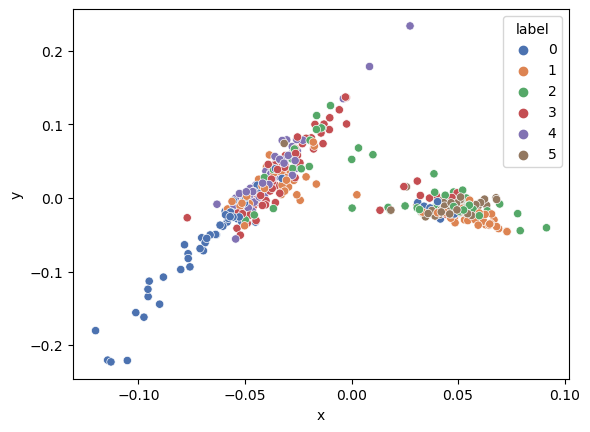

In [34]:
# Finding a low-dimension embedding for visualization: find the best position of
# the nodes (the stocks) on a 2D plane
from sklearn import manifold

def plot_embedding(data,labels):
    node_position_model = manifold.LocallyLinearEmbedding(n_components=2, eigen_solver="dense", n_neighbors=6)
    embedding = node_position_model.fit_transform(data)
    embedding = pd.DataFrame(embedding, columns = ['x','y'])
    embedding['label'] = labels
    sns.scatterplot(data = embedding, x = 'x', y = 'y', hue='label', palette = 'deep')
plot_embedding(data,labels)

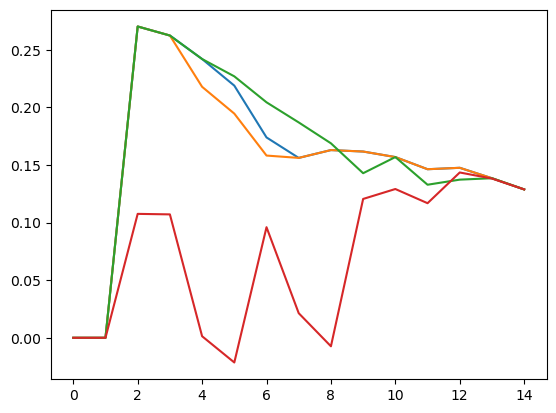

In [35]:
from sklearn.cluster import AgglomerativeClustering
list_linkage = ['ward', 'complete', 'average', 'single']
sil = np.zeros((4,15))
cnt = -1
for linkage in list_linkage:
    cnt += 1
    for k in range(2,15):
        ag = AgglomerativeClustering(n_clusters=k, linkage=linkage, compute_full_tree=True).fit(train)
        labels = ag.fit_predict(test)
        sil[cnt,k]=silhouette_score(test, labels, metric = 'euclidean')
plt.plot(sil[0])
plt.plot(sil[1])
plt.plot(sil[2])
plt.plot(sil[3])

In [36]:
ag = AgglomerativeClustering(n_clusters=4, linkage='ward', compute_full_tree=True)
ag = ag.fit(data)
labels = ag.labels_.reshape(-1)

labels.shape

(442,)

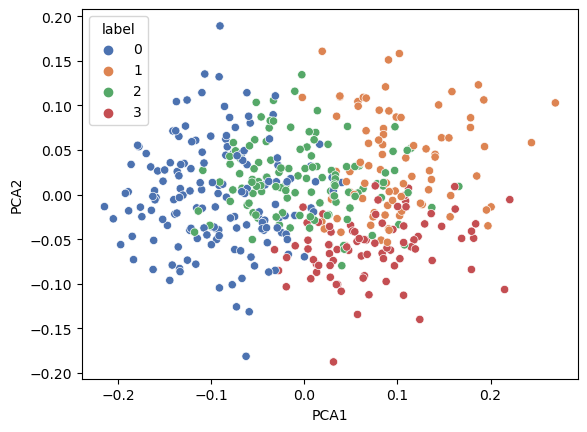

In [37]:
plot_pca(data, labels)

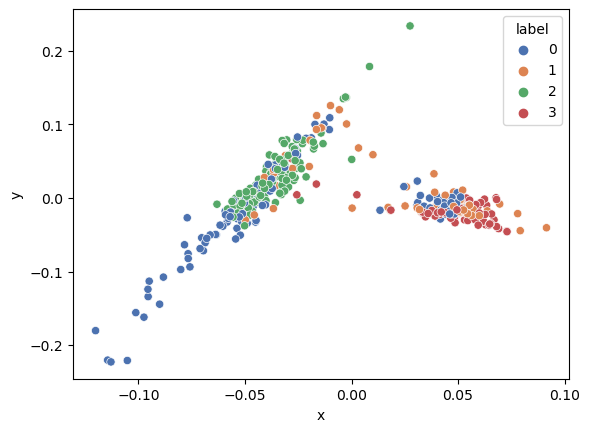

In [38]:
plot_embedding(data,labels)

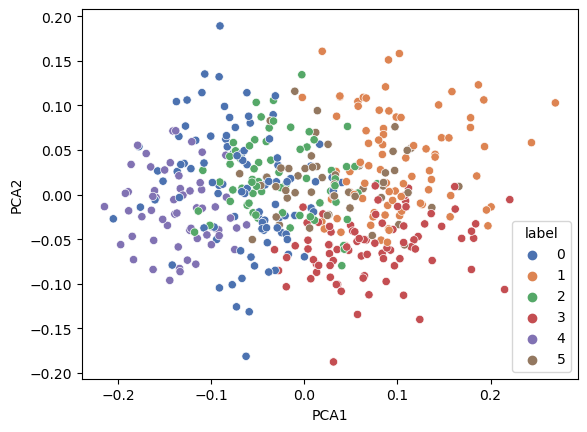

In [39]:
ag = AgglomerativeClustering(n_clusters=6, linkage='ward', compute_full_tree=True)
ag = ag.fit(data)
labels = ag.labels_.reshape(-1)
plot_pca(data, labels)

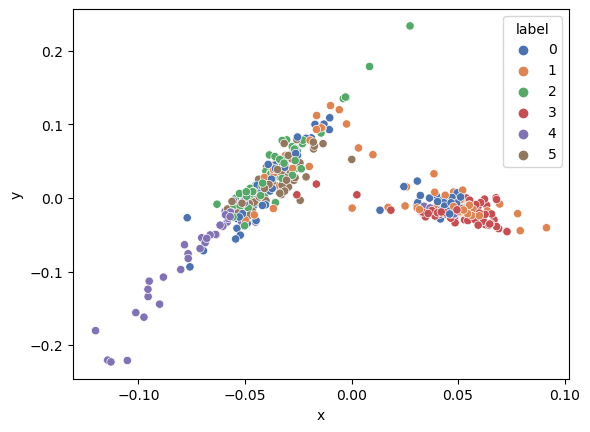

In [40]:
plot_embedding(data,labels)

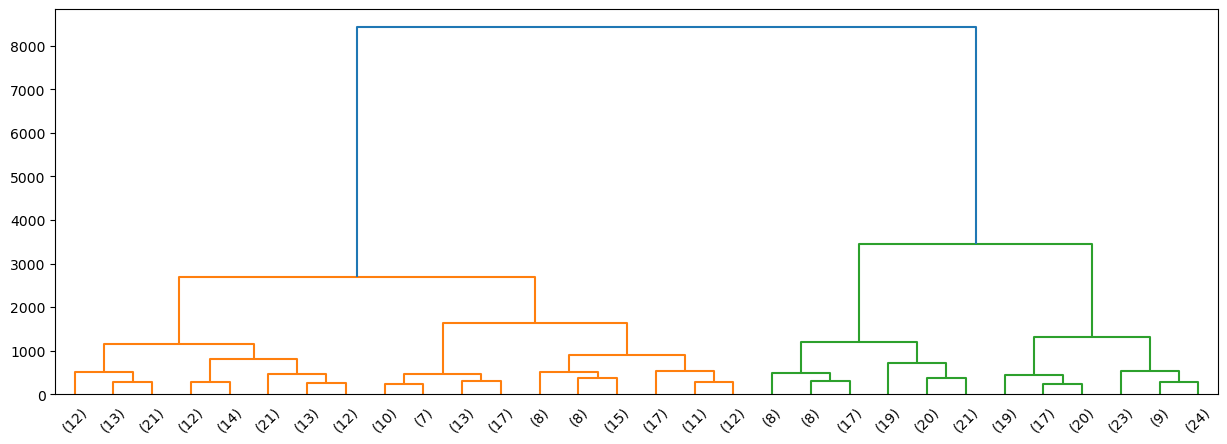

In [41]:
# First, we import the cluster hierarchy module from SciPy (described above) to obtain the linkage and dendrogram functions.
from scipy.cluster import hierarchy

Z = hierarchy.linkage(ag.children_, method='ward')

fig, ax = plt.subplots(figsize=(15,5))


den = hierarchy.dendrogram(Z, orientation='top', 
                           p=30, truncate_mode='lastp',
                           show_leaf_counts=True, ax=ax)

Estimated number of clusters: 33


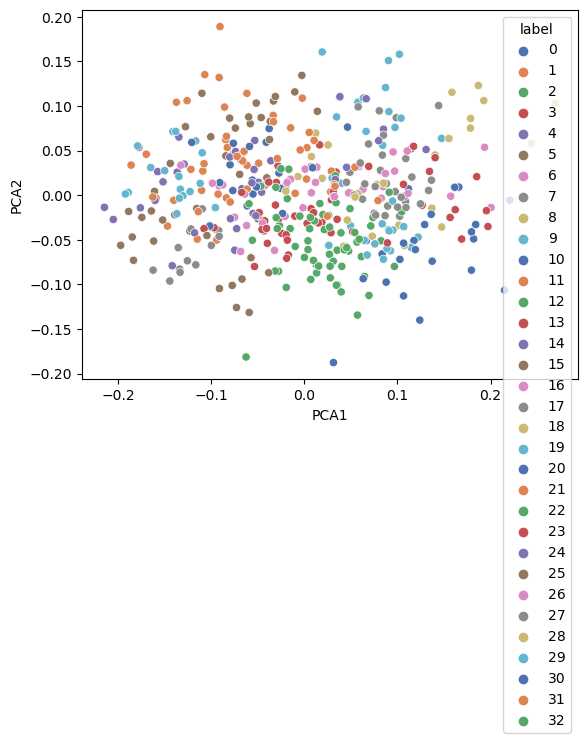

In [42]:
from sklearn.cluster import AffinityPropagation

af = AffinityPropagation().fit(data)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print("Estimated number of clusters: %d" % n_clusters_)
plot_pca(data,labels)

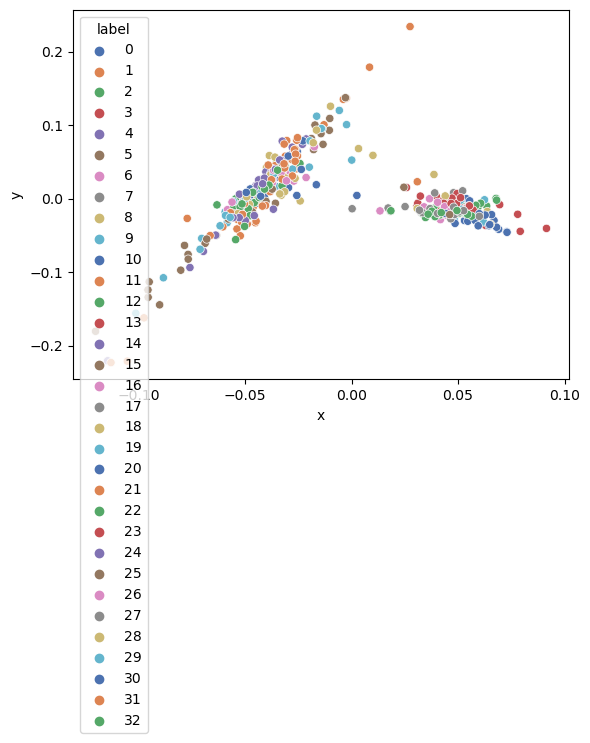

In [43]:
plot_embedding(data,labels)

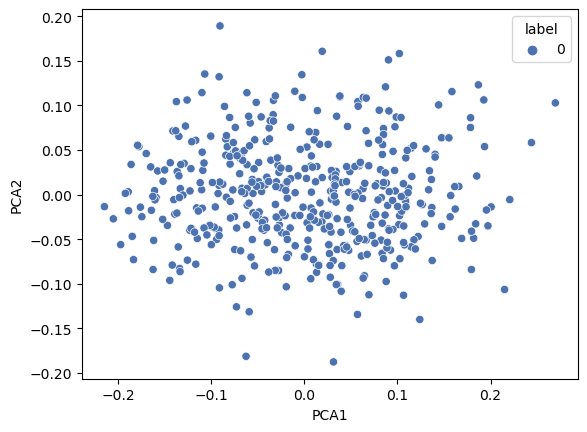

In [54]:
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth
clustering = MeanShift(bandwidth=estimate_bandwidth(data)).fit(data)
labels = clustering.labels_
plot_pca(data, labels)

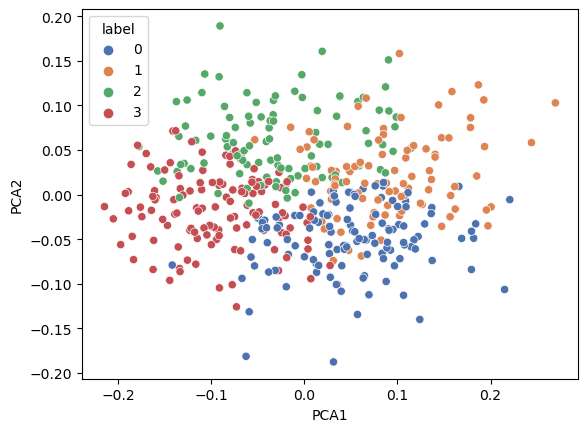

In [58]:
from sklearn.cluster import SpectralClustering

clustering = SpectralClustering(n_clusters=4, assign_labels='discretize', random_state=0).fit(data)

labels = clustering.labels_
plot_pca(data, labels)

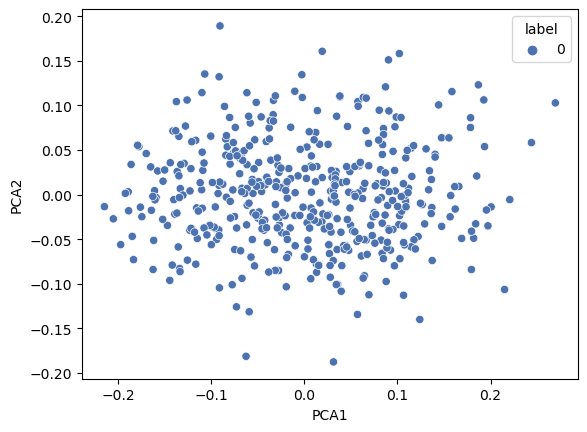

In [62]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=3, min_samples=5).fit(data)
labels = clustering.labels_
plot_pca(data, labels)
